# Loss Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import argparse
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

## Vocab

In [18]:
vocab = ''
fileName = "../data/yelp/vocabulary_yelp.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

9599

In [20]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

165683

In [24]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

164465

In [49]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

80069

In [90]:
vocab = ''
fileName = "../data/yelp/vocabulary_trump_en_lower.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

160137

In [100]:
new_vocab = vocab[:16021] #len(vocab) - 18*len(vocab)//100
len(new_vocab)
#vocab[::-1]

16021

In [101]:
pickle.dump(new_vocab, open( "../data/yelp/vocabulary_10_pct.pickle", "wb" ))

## Functions

In [2]:
def getLossesFromFile(base_path):
    i = 0
    losses = {}
    while True:
        fileName = base_path.format(i)
        print("Processing:", fileName)
        try:
            with open(fileName, 'rb') as fp:
                losses[i] = pickle.load(fp)
            i += 1
        except Exception as e:
            return losses, i

## Workflow

In [3]:
base_path = '../data/models/yelp/log/epoch_{}/losses.pickle'
output = "losses.png"

In [4]:
losses, n_epochs = getLossesFromFile(base_path)

Processing: ../data/models/yelp/log/epoch_0/losses.pickle
Processing: ../data/models/yelp/log/epoch_1/losses.pickle
Processing: ../data/models/yelp/log/epoch_2/losses.pickle
Processing: ../data/models/yelp/log/epoch_3/losses.pickle
Processing: ../data/models/yelp/log/epoch_4/losses.pickle
Processing: ../data/models/yelp/log/epoch_5/losses.pickle
Processing: ../data/models/yelp/log/epoch_6/losses.pickle
Processing: ../data/models/yelp/log/epoch_7/losses.pickle
Processing: ../data/models/yelp/log/epoch_8/losses.pickle
Processing: ../data/models/yelp/log/epoch_9/losses.pickle
Processing: ../data/models/yelp/log/epoch_10/losses.pickle


In [5]:
losses[0]

[{'reconstruction': 4.79893159866333,
  'generator': 4.138648986816406,
  'autoencoder': 8.937580108642578},
 {'reconstruction': 4.912110805511475,
  'generator': 4.4846272468566895,
  'autoencoder': 9.396738052368164},
 {'reconstruction': 4.7862467765808105,
  'generator': 4.411020755767822,
  'autoencoder': 9.197267532348633},
 {'reconstruction': 4.880107402801514,
  'generator': 4.489389896392822,
  'autoencoder': 9.369497299194336},
 {'reconstruction': 4.7530012130737305,
  'generator': 4.472747802734375,
  'autoencoder': 9.225749015808105},
 {'reconstruction': 4.776566505432129,
  'generator': 4.4428606033325195,
  'autoencoder': 9.219427108764648},
 {'reconstruction': 4.892599105834961,
  'generator': 4.3167595863342285,
  'autoencoder': 9.209358215332031},
 {'reconstruction': 5.101563453674316,
  'generator': 4.5575408935546875,
  'autoencoder': 9.659104347229004},
 {'reconstruction': 5.075345993041992,
  'generator': 4.5957350730896,
  'autoencoder': 9.67108154296875},
 {'recon

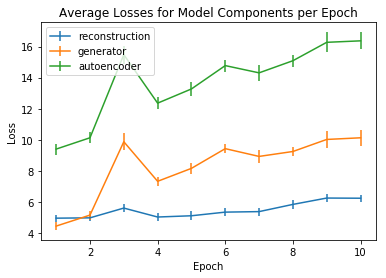

In [6]:
avgLossesById = defaultdict(list)
stdDevById = defaultdict(list)
for label in ['reconstruction', 'generator', 'autoencoder']:
    for i, epoch in losses.items():
        loss = []
        for batch in epoch:
            loss.append(float(batch[label]))
        avgLossesById[label].append(np.average(loss))
        stdDevById[label].append(np.std(loss))

# for i, epoch in losses.items():
#     loss = []
#     for batch in epoch:
#         loss.append(batch['discriminator0'] + batch['discriminator1'])
#     avgLossesById['discriminators'].append(np.average(loss))
#     stdDevById['discriminators'].append(np.std(loss))

labels = ['reconstruction', 'generator', 'autoencoder'] #'discriminators']
for label in labels:
    plt.errorbar(
        np.array(range(n_epochs)) + 1,
        avgLossesById[label],
        2 * np.array(stdDevById[label]))

plt.legend(labels, loc="best")
plt.title("Average Losses for Model Components per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig(output)